In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics, tree
from sklearn.tree import plot_tree

In [5]:
df = pd.read_csv(r"C:\Users\Rugved\OneDrive\Desktop\ML_Assgn\admission.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [13]:
print("Decription of Data\n")
print(df.describe())

print("\nData types of each attr\n")
print(df.dtypes)

print("\nTotal count of null values in data\n")
print(df.isnull().sum())

Decription of Data

       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

             LOR        CGPA    Research  Chance of Admit  
count  500.00000  500.000000  500.000000        500.00000  
mean     3.48400    8.576440    0.560000          0.72174  
std      0.92545    0.604813    0.496884          0.14114  
min      1.00000    6.800000    0.000000      

In [27]:
df.loc[df['Chance of Admit'] < 0.8, 'Chance of Admit'] = 0
df.loc[df['Chance of Admit'] >= 0.8, 'Chance of Admit'] = 1

df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,0.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [25]:
X = df.drop(['Serial No.', 'Chance of Admit'], axis=1)
y = df['Chance of Admit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [29]:
DT = DecisionTreeClassifier()

DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
y_pred = DT.predict(X_test)

print(X_test)
print(y_pred)

     GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research
285        331          116                  5  4.0  4.0  9.26         1
102        314          106                  2  4.0  3.5  8.25         0
148        339          116                  4  4.0  3.5  9.80         1
487        327          115                  4  3.5  4.0  9.14         0
388        296           97                  2  1.5  2.0  7.80         0
..         ...          ...                ...  ...  ...   ...       ...
216        322          112                  4  4.5  4.5  9.26         1
241        317          103                  2  2.5  2.0  8.15         0
369        301           98                  1  2.0  3.0  8.03         1
311        328          108                  4  4.5  4.0  9.18         1
7          308          101                  2  3.0  4.0  7.90         0

[100 rows x 7 columns]
[1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 1.

In [41]:
print("Confusion Matrix")

conf_mat = metrics.confusion_matrix(y_test, y_pred)
conf_mat

Confusion Matrix


array([[61,  5],
       [ 7, 27]], dtype=int64)

In [43]:
print("1. Accuracy Score:", metrics.accuracy_score(y_test, y_pred))
print("2. Precision Score:",metrics.precision_score(y_test, y_pred))
print("3. Recall Score:", metrics.recall_score(y_test, y_pred))
print("4. f1 Score:", metrics.f1_score(y_test, y_pred))

1. Accuracy Score: 0.88
2. Precision Score: 0.84375
3. Recall Score: 0.7941176470588235
4. f1 Score: 0.8181818181818182


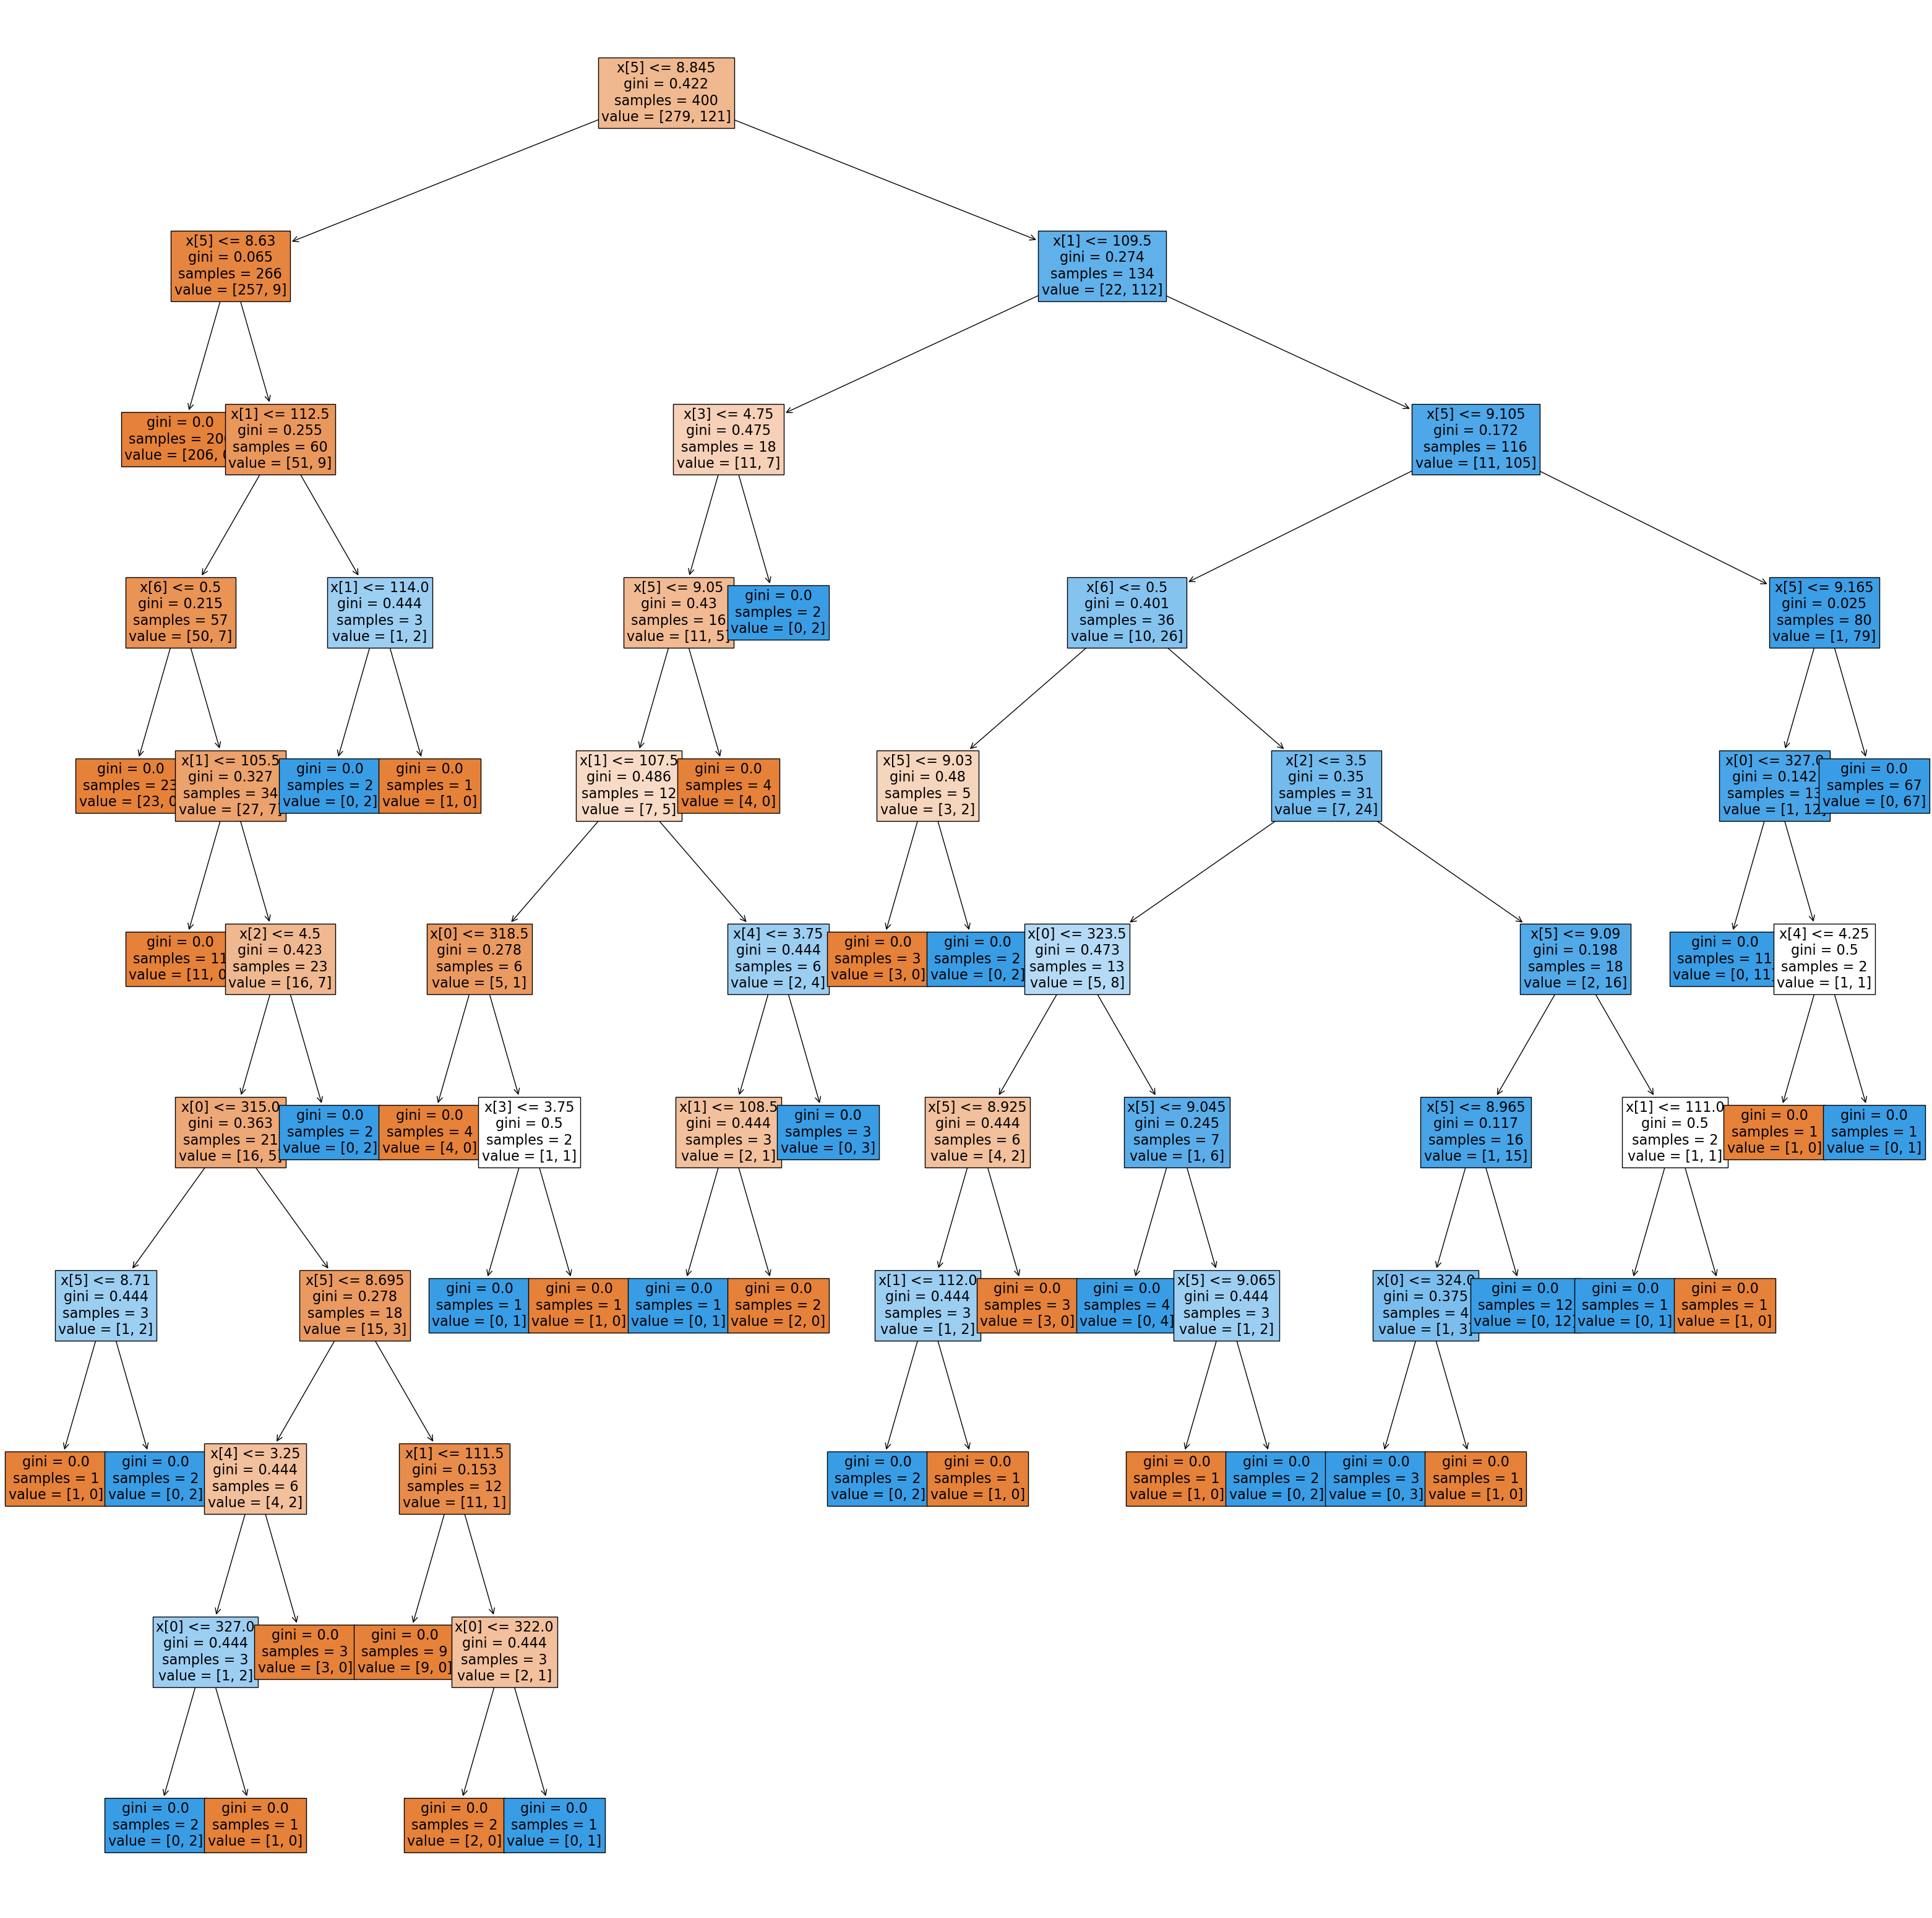

In [53]:
plt.figure(figsize=(40,40))
tree.plot_tree(DT, filled=True, fontsize=16)
plt.show()

In [57]:
print("FINAL SCORE or accuracy of Decision Tree: ", DT.score(X_test, y_test))

FINAL SCORE or accuracy of Decision Tree:  0.88
